In [1]:
%pylab inline

import sys
import os

par_dir = os.path.split(os.path.split(os.getcwd())[0])[0]
if par_dir not in sys.path:
    sys.path.append(par_dir)
import thulium_python_lib.usefull_functions as usfuncs
import thulium_python_lib.image_processing_new as impr

from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib
Done importing, module image_processing now


In [2]:
def gaussian(x,N,x0,sigma, background):
    """Returns value of a 1D-gaussian with the given parameters ,N,x0,sigma, background; radius  by 1/e**2"""
    #from numpy import sqrt,pi,exp
    return N / (sigma * sqrt(pi)) * exp(-2*(x - x0)**2/(sigma**2)) + background

def ff(x,x0,w0,alpha):
    return w0*sqrt(1 + ((x-x0)*alpha/w0)**2)

Внимание!!

Фотографии пучка должны находиться сразу в папке. Также подразумевается, что название фотографии - число

In [42]:
os.chdir(r'D:\!Data\2017_10_12\Repumps_photos')
folder = '2'
working_directory = os.path.join(os.getcwd(),folder)
os.listdir(working_directory)

['DSC_0978.NEF',
 'DSC_0979.NEF',
 'DSC_0980.NEF',
 'DSC_0981.NEF',
 'DSC_0982.NEF',
 'DSC_0983.NEF']

In [63]:
im = imread(os.path.join(working_directory,'DSC_0978.NEF'),format='NEF')[:,:,0]

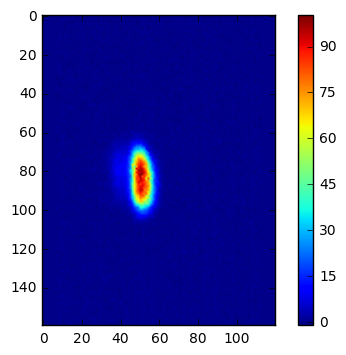

In [65]:
imshow(im.T -  sum(im[:,0:40],axis=1)/40)
colorbar()

In [4]:
λ=0.530e-6

DSC_0978.NEF
1644.97597782
613.290908519
DSC_0979.NEF
1836.8015012
602.078215701
DSC_0980.NEF
1322.89072411
791.272328715
DSC_0981.NEF
1341.67313578
977.498300667
DSC_0982.NEF
1413.69446957
1099.72498952
DSC_0983.NEF
2110.2244406
675.873274339


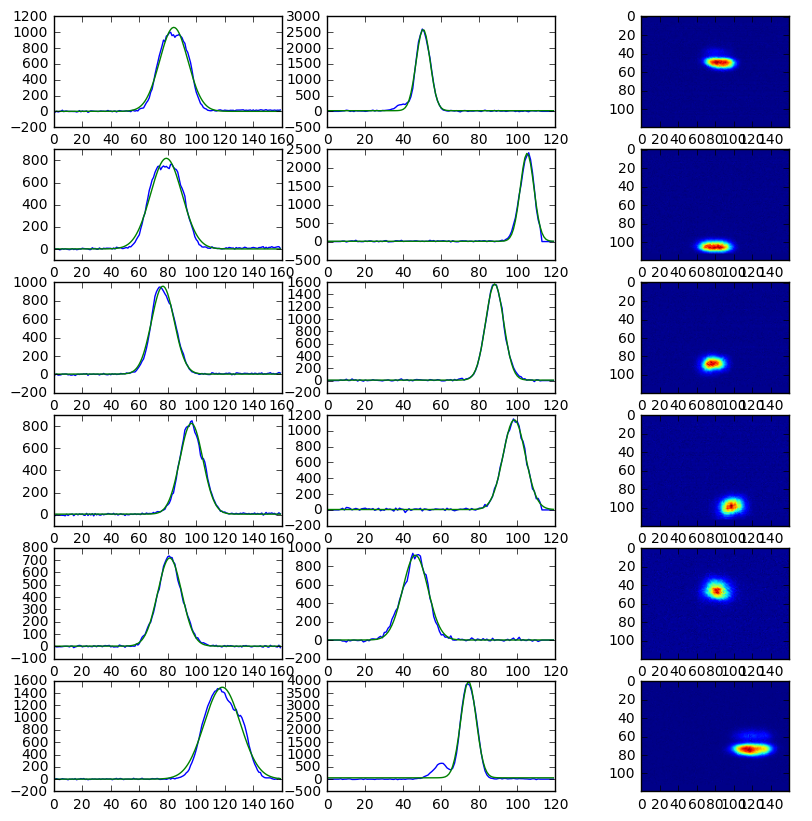

In [74]:
fig, ax = plt.subplots(len(os.listdir(working_directory)),3,figsize=(10,10))#,figsize=(10,4)
res = []
for j,im in enumerate(os.listdir(working_directory)):
    prom = []
#     prom.append(int(im.split('.')[0]))
    data = imread(os.path.join(working_directory,im))[:,:,0]
#    print(argmax(data)//len(data),argmax(data)%len(data))
    data = (data.T -  sum(data[:,0:40],axis=1)/40).T
    print(im)
    for i in (0,1):
        dpt = data.sum(axis=i)
        popt, pcov = curve_fit(gaussian,range(len(dpt)), dpt,p0=(max(dpt),argmax(dpt),10,100),bounds=(0,inf))
        ax[j,i].plot(dpt)
        print(popt[2]*3.4*24.5)
#         print(np.sqrt(np.diag(pcov)))
        ax[j,i].plot(gaussian(range(len(dpt)),*popt))
        prom.append(popt[2])
    ax[j,2].imshow(data)
    res.append(prom)
res = array(res)

ValueError: invalid literal for int() with base 10: 'DSC_0972'

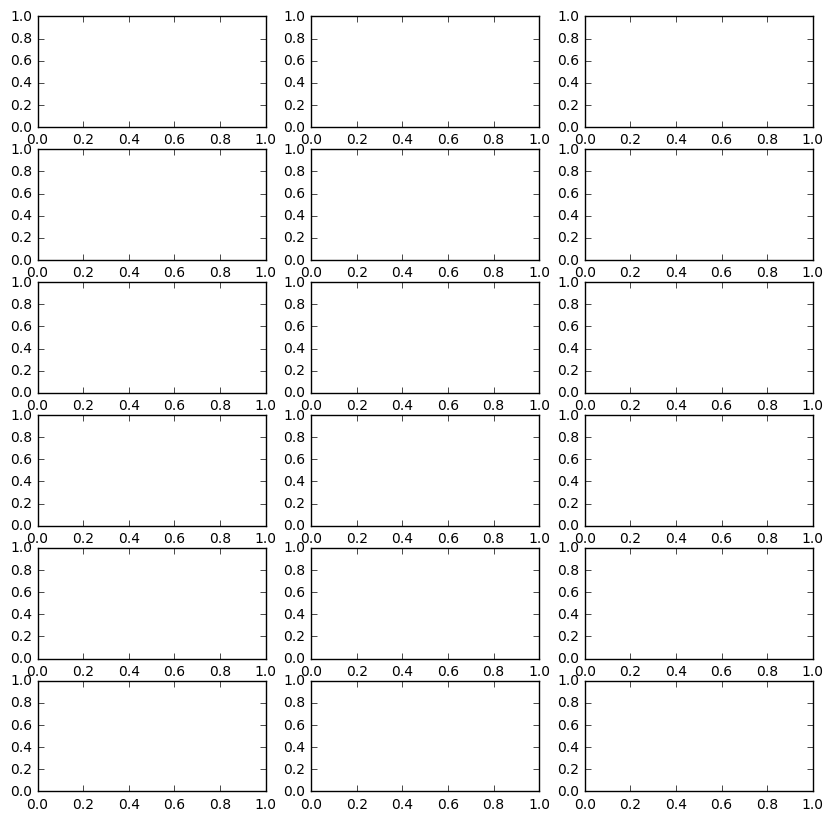

In [5]:
fig, ax = plt.subplots(len(os.listdir(working_directory)),3,figsize=(10,10))#,figsize=(10,4)
res = []
cut=[[200,300],[170,250],[220,300],[180,280]]
for j,im in enumerate(os.listdir(working_directory)[0:4]):
    prom = []
    prom.append(int(im.split('.')[0]))
    data = imread(os.path.join(working_directory,im))
#    print(argmax(data)//len(data),argmax(data)%len(data))
    data = data[cut[j][0]:cut[j][1]]
    print(im)
    for i in (0,1):
        dpt = data.sum(axis=i)
        popt, pcov = curve_fit(gaussian,range(len(dpt)), dpt,p0=(max(dpt),argmax(dpt),10,100),bounds=(0,inf))
        ax[j,i].plot(dpt)
        print(popt)
#         print(np.sqrt(np.diag(pcov)))
        ax[j,i].plot(gaussian(range(len(dpt)),*popt))
        prom.append(popt[2])
    ax[j,2].imshow(data)
    res.append(prom)
res = array(res)

In [6]:
i=1
dpt = data.sum(axis=i)
xx=4.65 * arange(len(dpt))/1e3
popt, pcov = curve_fit(gaussian,range(len(dpt)), dpt,p0=(max(dpt),argmax(dpt),10,100),bounds=(0,inf))
plot(xx,dpt/max(dpt))
plot(xx,gaussian(range(len(dpt)),*popt)/max(dpt))
ylabel('Амплитуда, отн.ед.',family="verdana")
xlabel('Координата, мм.',family="verdana")
ylim(top=1)
print(4.65*popt[2])
#savefig('blue_1d_y.png')

NameError: name 'data' is not defined

In [78]:
data.shape

(100, 696)

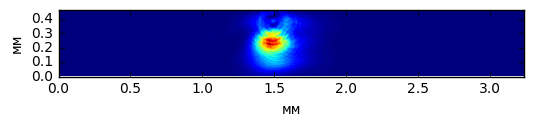

In [79]:
imshow(data,extent=[0,data.shape[1]*4.65/1000,0,data.shape[0]*4.65/1000])
xlabel('мм',family="verdana")
ylabel("мм",family="verdana")
#savefig('blue2d.png')

Plot particular axis and fit

[ -3.32190856e-01   3.33136110e+01   3.41259497e-07]


c:\program files\anaconda\lib\site-packages\scipy\optimize\minpack.py:690: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


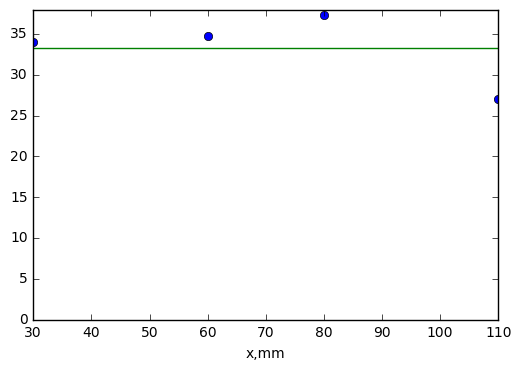

In [80]:
axs = 2
popt, pcov = curve_fit(ff,res[:,0],res[:,axs],p0=(30,10,1))
print(popt)
plot(res[:,0], res[:,axs],'o')
ylim(bottom=0)
plot(linspace(min(res[:,0]),max(res[:,0]),100),ff(linspace(min(res[:,0]),max(res[:,0]),100),*popt))
xlabel('x,mm')

In [ ]:
40*4.65 * 2.3

### Beam divergence
Gaussian

In [ ]:
λ/(pi*popt[1]*4.65*1e-6)

Real (if x axis in mm than 1e-3, if in cm than 1e-3)

In [ ]:
θ = popt[2]*4.65*1e-4
θ

Gaussian from minimum measured waist

In [ ]:
λ/(pi*min(res[:,1])*4.65*1e-6)

$M^2$ parameter from this work (find in e-mail to Timofey).Careful with coeffitients

In [ ]:
pi * 2 *popt[1]*4.65*1e-3 * θ*1e3 / (4 * λ*1e6) 

For individual image

In [ ]:
# aa = imread('2/42.bmp')[400:900,700:1200]
aa = imread('01 photos/CV_Image_916_160513_114252_865.jpg')[150:300,200:350,0]
imshow(aa)
colorbar()
#savefig('2d_410.png')

In [ ]:
plot(sum(aa,axis=1))
dpt = aa.sum(axis=1)
popt, pcov = curve_fit(gaussian,range(len(dpt)), dpt,p0=(1000,60,20,1000))
plot(range(len(dpt)),gaussian(range(len(dpt)),*popt))
#savefig('1dy_410.png')

In [ ]:
    dpt = aa.sum(axis=1)
    popt, pcov = curve_fit(gaussian,range(len(dpt)), dpt,p0=(10000,70,20,1000))